# Phase 1 Project DS (Flatiron): Aviation Risk Analysis

# Objectif
Ce projet vise à identifier les modèles d’avions les moins risqués à partir des données historiques d’accidents d’aviation (1962–2023), afin de guider une entreprise qui souhaite investir dans l’aviation commerciale et privée.

# Méthodologie
Nous allons :
- Nettoyer et explorer les données
- Identifier des tendances pertinentes
- Formuler 3 recommandations business appuyées par des visualisations

# #1 Chargement des données

Importation  du fichier CSV `AviationData.csv` depuis le dossier `data/`


In [5]:
# Étape 1 : importer pandas
import pandas as pd

# Étape 2 : lire le fichier CSV avec un encodage compatible
df = pd.read_csv("../data/AviationData.csv", encoding='latin1')

# Étape 3 : afficher les premières lignes
df.head()



C:\Users\ESIH_ENERGIR\AppData\Local\Temp\ipykernel_20128\4135300035.py:5: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/AviationData.csv", encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


#  #2. Ex#ploration de la structure des données

Analysons les dimensions, colonnes disponibles, types de données et valeurs manquantes.


In [14]:
# Dimensions
df.shape
# Liste  colonnes
df.columns.tolist()

# Types  données
df.dtypes

# Valeurs manquantes
df.isnull().sum().sort_values(ascending=False)

# Aperçu statistique
df.describe(include='all')



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


# #3. Colonnes importantes

Colonnes qu’on va utiliser :

- `Make` → avion
- `Location` → où l’accident s’est produit
- `Country` → pays
- `Event.Date` → date
- `Purpose.of.flight` → pourquoi le vol a eu lieu (ex : personnel, commercial)




In [19]:

# Afficher les noms de colonnes exacts
#df.columns.tolist()

# colonnes utiles
df[['Event.Date', 'Location', 'Country', 'Make', 'Purpose.of.flight']].head()


,Event.Date,Location,Country,Make,Purpose.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,Personal
1,1962-07-19,"BRIDGEPORT, CA",United States,Piper,Personal
2,1974-08-30,"Saltville, VA",United States,Cessna,Personal
3,1977-06-19,"EUREKA, CA",United States,Rockwell,Personal
4,1979-08-02,"Canton, OH",United States,Cessna,Personal



# #4. Nettoyage simple

Nettoyage des données pour mieux les analyser :
- Supprimer les lignes où il manque `Make`
- Convertir `Event.Date` en format date
- Mettre les noms d’avions (`Make`) en minuscules


In [21]:
# Supprimer les lignes où 'Make' est vide
df = df.dropna(subset=['Make'])

# Convertir la colonne 'Event.Date' en format date
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Mettre les marques d’avion en minuscules
df['Make'] = df['Make'].str.lower()

#Apercu
df[['Event.Date', 'Make']].head()



,Event.Date,Make
0,1948-10-24,stinson
1,1962-07-19,piper
2,1974-08-30,cessna
3,1977-06-19,rockwell
4,1979-08-02,cessna


# #5. Marques d’avions les plus impliquées

On compte combien d'accidents pour chaque marque d’avion (`Make`) et on affiche les 15 plus fréquentes.


In [22]:
# Compter les accidents par marque (Top 15)
make_counts = df['Make'].value_counts().head(15)

# Afficher le résultat
print(make_counts)


Make
cessna               27149
piper                14870
beech                 5372
boeing                2745
bell                  2722
mooney                1334
robinson              1230
grumman               1172
bellanca              1045
hughes                 932
schweizer              773
air tractor            691
aeronca                636
mcdonnell douglas      608
maule                  589
Name: count, dtype: int64


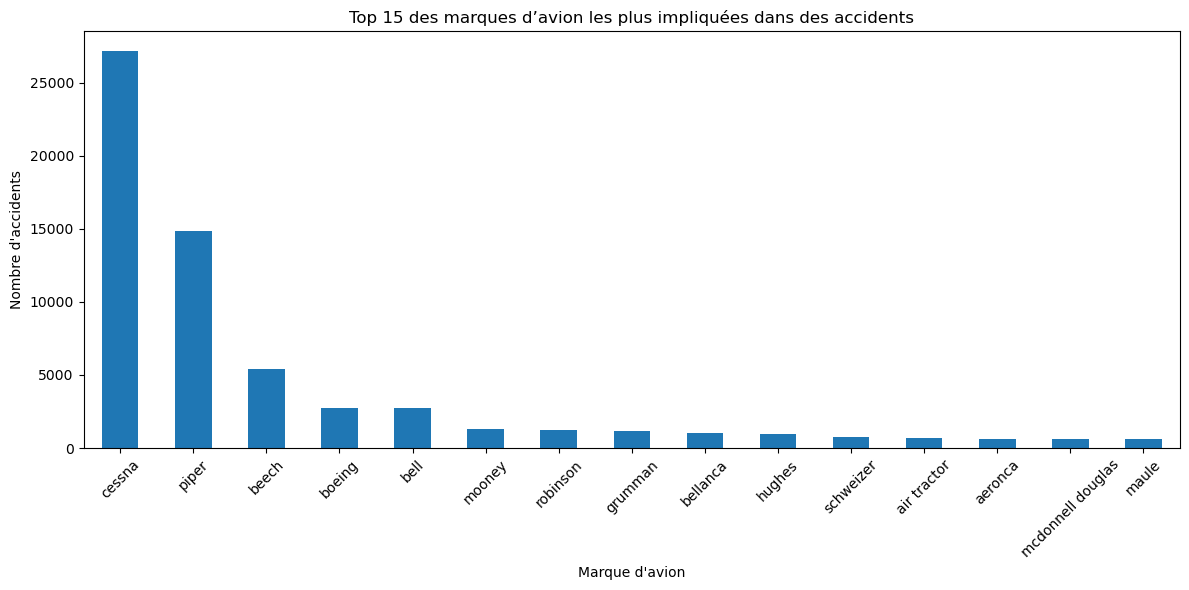

In [24]:
import matplotlib.pyplot as plt

# Bar chart pour le Top 15
make_counts.plot(kind='bar', figsize=(12,6))
plt.title("Top 15 des marques d’avion les plus impliquées dans des accidents")
plt.xlabel("Marque d'avion")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# #6. Accidents par pays
nombre d'accidents par pays (`Country`) pour voir où les risques sont les plus fréquents.


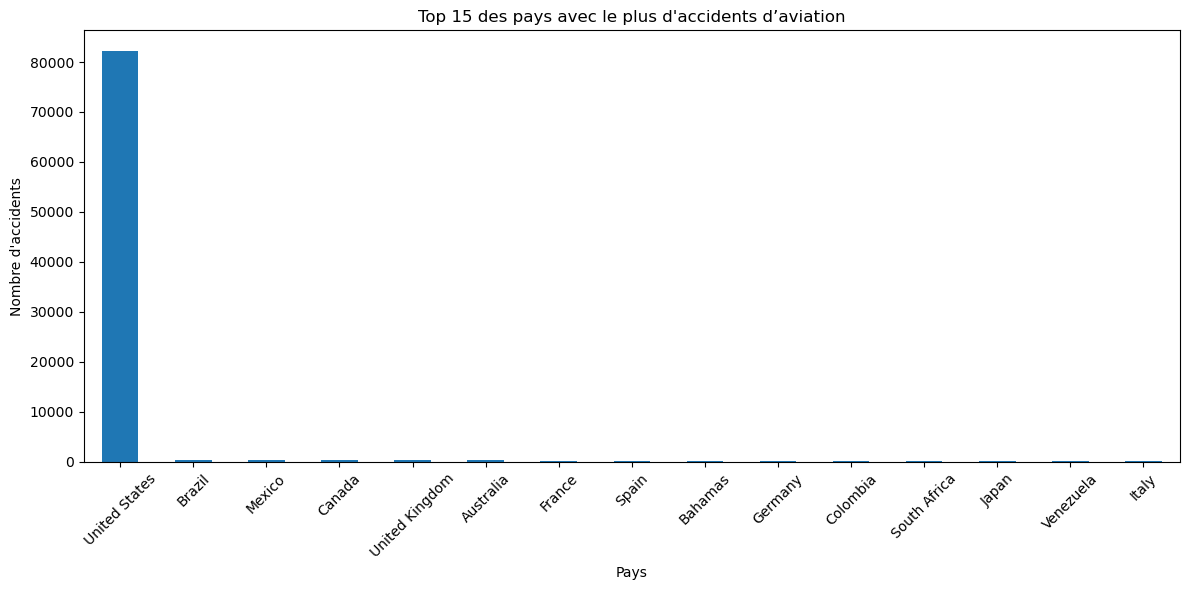

In [37]:
country_counts.plot(kind='bar', figsize=(12,6))
plt.title("Top 15 des pays avec le plus d'accidents d’aviation")
plt.xlabel("Pays")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



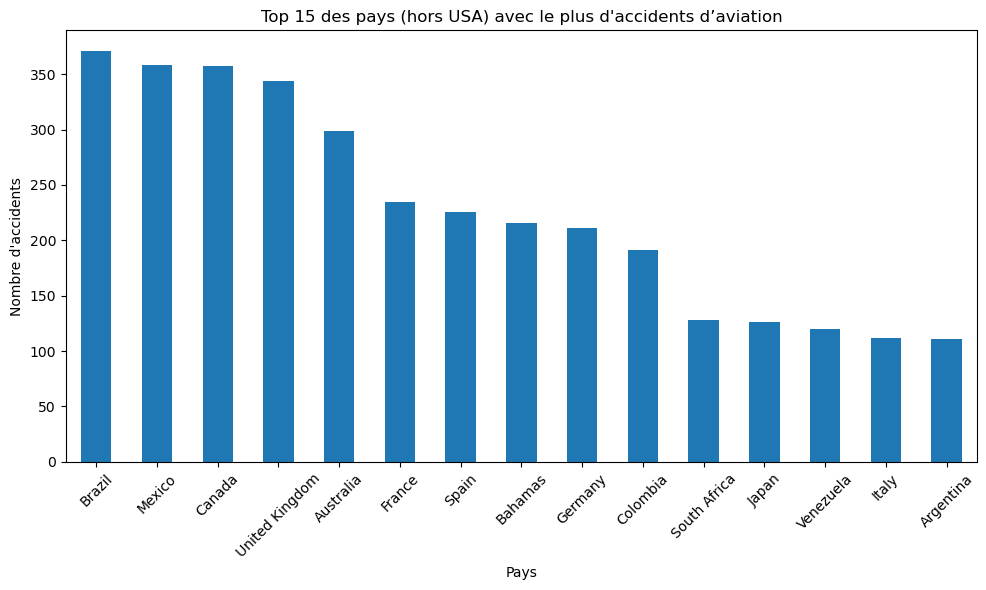

In [38]:
# Supprimer les États-Unis
country_no_us = df[df['Country'] != 'United States']
top15_no_us = country_no_us['Country'].value_counts().head(15)

# Graphique
top15_no_us.plot(kind='bar', figsize=(10,6))
plt.title("Top 15 des pays (hors USA) avec le plus d'accidents d’aviation")
plt.xlabel("Pays")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# #7. Accidents par année

nombre d'accidents chaque année pour voir l’évolution dans le temps.


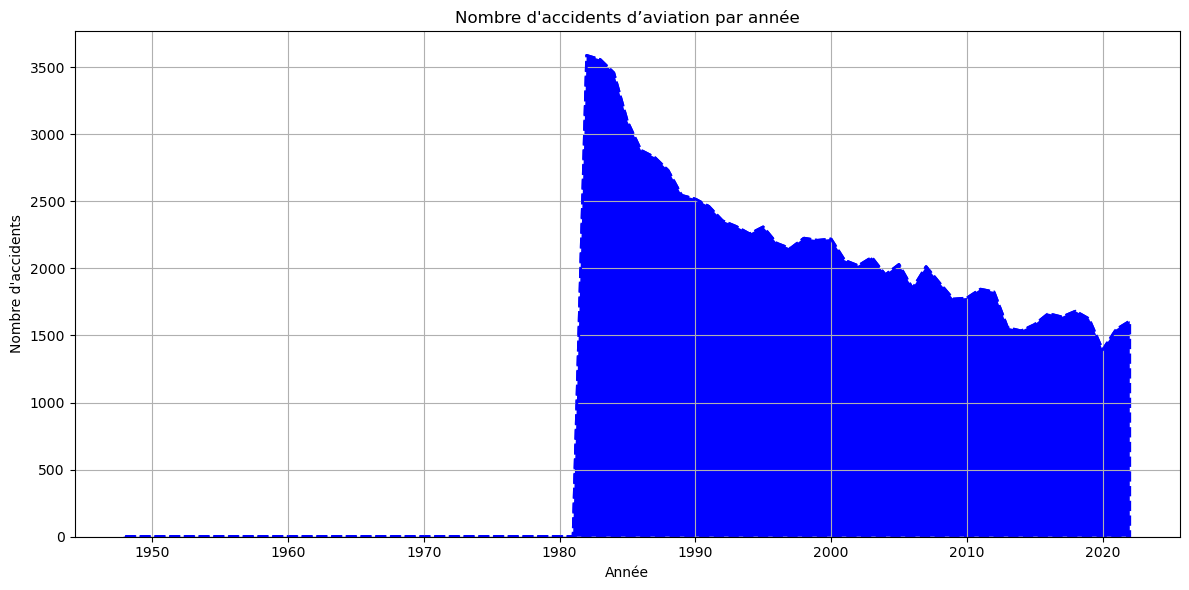

In [57]:
# Creation une nouvelle colonne "Year"
df['Year'] = df['Event.Date'].dt.year

# Compter  accidents par année
#year_counts = df['Year'].value_counts().sort_index()


# Affichage graphique

year_counts.plot(kind='area', color='blue', linestyle='--', linewidth=2, figsize=(12,6))

plt.title("Nombre d'accidents d’aviation par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'accidents")
plt.grid(True)
plt.tight_layout()


plt.show()



# #8. Recommandations business

Voici 3 recommandations basées sur les visualisations précédentes :


# 1. Éviter les marques d’avion à haut risque
La marque **Cessna** totalise plus de 27 000 accidents, suivie de Piper et Beech.  
Nous recommandons **de ne pas commencer avec ces modèles**, sauf pour des besoins spécifiques avec inspection renforcée.

---

# 2. Ne pas lancer aux États-Unis en premier
Les **États-Unis représentent une énorme part des accidents**.  
Nous avons créé un graphique secondaire sans les USA pour identifier les pays les plus risqués après eux.  
Nous recommandons **de viser d’autres marchés comme le Canada ou l’Australie** pour un démarrage plus maîtrisé.

---

# 3. Privilégier des appareils récents
Les données montrent une **baisse importante des accidents depuis les années 1980**. Cela reflète l’amélioration des normes techniques et de sécurité. Nous recommandons **de prioriser les avions modernes (post-2000)** lors de l’achat.

